<a href="https://colab.research.google.com/github/connectasp/ML_Task6/blob/main/Guvi_Assignment8.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Assignment8

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn import linear_model
from sklearn.linear_model import LinearRegression

# How Much is Your Car Worth?

Data about the retail price of 2005 General Motors cars can be found in `car_data.csv`.

The columns are:

1. Price: suggested retail price of the used 2005 GM car in excellent condition.
2. Mileage: number of miles the car has been driven
3. Make: manufacturer of the car such as Saturn, Pontiac, and Chevrolet
4. Model: specific models for each car manufacturer such as Ion, Vibe, Cavalier
5. Trim (of car): specific type of car model such as SE Sedan 4D, Quad Coupe 2D          
6. Type: body type such as sedan, coupe, etc.      
7. Cylinder: number of cylinders in the engine        
8. Liter: a more specific measure of engine size     
9. Doors: number of doors           
10. Cruise: indicator variable representing whether the car has cruise control (1 = cruise)
11. Sound: indicator variable representing whether the car has upgraded speakers (1 = upgraded)
12. Leather: indicator variable representing whether the car has leather seats (1 = leather)

## Tasks, Part 1

1. Find the linear regression equation for mileage vs price.
2. Chart the original data and the equation on the chart.
3. Find the equation's $R^2$ score (use the `.score` method) to determine whether the
equation is a good fit for this data. (0.8 and greater is considered a strong correlation.)

## Tasks, Part 2

1. Use mileage, cylinders, liters, doors, cruise, sound, and leather to find the linear regression equation.
2. Find the equation's $R^2$ score (use the `.score` method) to determine whether the
equation is a good fit for this data. (0.8 and greater is considered a strong correlation.)
3. Find the combination of the factors that is the best predictor for price.

## Tasks, Hard Mode

1. Research dummy variables in scikit-learn to see how to use the make, model, and body type.
2. Find the best combination of factors to predict price.

In [3]:
df = pd.read_csv("car_data.csv")
df

,Price,Mileage,Make,Model,Trim,Type,Cylinder,Liter,Doors,Cruise,Sound,Leather
0,17314.103129,8221,Buick,Century,Sedan 4D,Sedan,6,3.1,4,1,1,1
1,17542.036083,9135,Buick,Century,Sedan 4D,Sedan,6,3.1,4,1,1,0
2,16218.847862,13196,Buick,Century,Sedan 4D,Sedan,6,3.1,4,1,1,0
3,16336.913140,16342,Buick,Century,Sedan 4D,Sedan,6,3.1,4,1,0,0
4,16339.170324,19832,Buick,Century,Sedan 4D,Sedan,6,3.1,4,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...
799,16507.070267,16229,Saturn,L Series,L300 Sedan 4D,Sedan,6,3.0,4,1,0,0
800,16175.957604,19095,Saturn,L Series,L300 Sedan 4D,Sedan,6,3.0,4,1,1,0
801,15731.132897,20484,Saturn,L Series,L300 Sedan 4D,Sedan,6,3.0,4,1,1,0
802,15118.893228,25979,Saturn,L Series,L300 Sedan 4D,Sedan,6,3.0,4,1,1,0


In [4]:
df.shape

(804, 12)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 804 entries, 0 to 803
Data columns (total 12 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Price     804 non-null    float64
 1   Mileage   804 non-null    int64  
 2   Make      804 non-null    object 
 3   Model     804 non-null    object 
 4   Trim      804 non-null    object 
 5   Type      804 non-null    object 
 6   Cylinder  804 non-null    int64  
 7   Liter     804 non-null    float64
 8   Doors     804 non-null    int64  
 9   Cruise    804 non-null    int64  
 10  Sound     804 non-null    int64  
 11  Leather   804 non-null    int64  
dtypes: float64(2), int64(6), object(4)
memory usage: 75.5+ KB


In [6]:
df.describe()

,Price,Mileage,Cylinder,Liter,Doors,Cruise,Sound,Leather
count,804.000000,804.000000,804.000000,804.000000,804.000000,804.000000,804.000000,804.000000
mean,21343.143767,19831.934080,5.268657,3.037313,3.527363,0.752488,0.679104,0.723881
std,9884.852801,8196.319707,1.387531,1.105562,0.850169,0.431836,0.467111,0.447355
min,8638.930895,266.000000,4.000000,1.600000,2.000000,0.000000,0.000000,0.000000
25%,14273.073870,14623.500000,4.000000,2.200000,4.000000,1.000000,0.000000,0.000000
50%,18024.995019,20913.500000,6.000000,2.800000,4.000000,1.000000,1.000000,1.000000
75%,26717.316636,25213.000000,6.000000,3.800000,4.000000,1.000000,1.000000,1.000000
max,70755.466717,50387.000000,8.000000,6.000000,4.000000,1.000000,1.000000,1.000000


The R2 score for this Data is 0.02046344732348926
The Intersept was the Data is 24764.559006061685
The error rate for the Data is [-0.1725205]
The equation for the linear regression Y = [-0.1725205]*x + 24764.559006061685


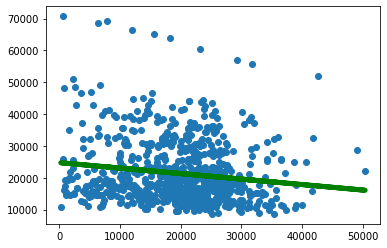

In [17]:
X=df[["Mileage"]]
Y=df["Price"]
LR = LinearRegression()
LR.fit(X,Y)
pred_x = LR.predict(X)
intercept = LR.intercept_
coefficient = LR.coef_
print("The R2 score for this Data is",LR.score(X,Y))
print("The Intersept was the Data is",intercept)
print("The error rate for the Data is",coefficient)
print(f"The equation for the linear regression Y = {coefficient}*x + {intercept}")
plt.scatter(X,Y)
plt.plot(X,pred_x,c="g",linewidth=5)
plt.show()

#**Task** Part 2

In [18]:
X = df[["Mileage","Cylinder","Liter","Doors","Cruise","Sound","Leather"]]
Y=df["Price"]
LR = LinearRegression()
LR.fit(X,Y)
intercept = LR.intercept_
coefficient = LR.coef_
print("The R2 score for this Data is",LR.score(X,Y))
print("The Intersept was the Data is",intercept)
print("The error rate for the Data is",coefficient)
print("The equation for the linear regression is Y = {coefficient}*x + {intercept}")

The R2 score for this Data is 0.4462643536728379
The Intersept was the Data is 6758.755143598106
The error rate for the Data is [-1.69747832e-01  3.79237893e+03 -7.87220732e+02 -1.54274585e+03
  6.28899715e+03 -1.99379528e+03  3.34936162e+03]
The equation for the linear regression is Y = {coefficient}*x + {intercept}


#**Task** Hard Mode

In [23]:
df1 = df.copy()
df1[['Make','Model','Type']] = df1[['Make','Model','Type']].astype('category')
df1.dtypes

Price        float64
Mileage        int64
Make        category
Model       category
Trim          object
Type        category
Cylinder       int64
Liter        float64
Doors          int64
Cruise         int64
Sound          int64
Leather        int64
dtype: object

In [24]:
df1['Make'] = df1['Make'].cat.codes
df1['Model'] = df1['Model'].cat.codes
df1['Type'] = df1['Type'].cat.codes

In [25]:
df1

,Price,Mileage,Make,Model,Trim,Type,Cylinder,Liter,Doors,Cruise,Sound,Leather
0,17314.103129,8221,0,10,Sedan 4D,3,6,3.1,4,1,1,1
1,17542.036083,9135,0,10,Sedan 4D,3,6,3.1,4,1,1,0
2,16218.847862,13196,0,10,Sedan 4D,3,6,3.1,4,1,1,0
3,16336.913140,16342,0,10,Sedan 4D,3,6,3.1,4,1,0,0
4,16339.170324,19832,0,10,Sedan 4D,3,6,3.1,4,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...
799,16507.070267,16229,5,21,L300 Sedan 4D,3,6,3.0,4,1,0,0
800,16175.957604,19095,5,21,L300 Sedan 4D,3,6,3.0,4,1,1,0
801,15731.132897,20484,5,21,L300 Sedan 4D,3,6,3.0,4,1,1,0
802,15118.893228,25979,5,21,L300 Sedan 4D,3,6,3.0,4,1,1,0


In [26]:
X = df1[['Mileage','Cylinder','Make','Model','Type','Liter','Doors','Cruise','Sound','Leather']]
Y = df1['Price']
LR2 = LinearRegression()
LR2.fit(X,Y)
intercept = LR2.intercept_
coefficient = LR2.coef_
print("The Intersept of the Data is", intercept)
print("The error rate of the Data is", coefficient)
print(LR2.score(X,Y))

The Intersept of the Data is 3039.643502709321
The error rate of the Data is [-1.71673657e-01  4.87578755e+03  8.32075788e+02 -2.05034394e+02
  4.31124572e+01 -8.92252597e+02 -1.50175555e+03  5.14099964e+03
 -1.33287926e+03  2.77089529e+03]
0.48569139005488515


#**Getting dummy variables for checking better combination of factors to predict price** 

In [27]:
new_df = pd.get_dummies(df1,columns=["Make","Type"])
new_df

,Price,Mileage,Model,Trim,Cylinder,Liter,Doors,Cruise,Sound,Leather,...,Make_1,Make_2,Make_3,Make_4,Make_5,Type_0,Type_1,Type_2,Type_3,Type_4
0,17314.103129,8221,10,Sedan 4D,6,3.1,4,1,1,1,...,0,0,0,0,0,0,0,0,1,0
1,17542.036083,9135,10,Sedan 4D,6,3.1,4,1,1,0,...,0,0,0,0,0,0,0,0,1,0
2,16218.847862,13196,10,Sedan 4D,6,3.1,4,1,1,0,...,0,0,0,0,0,0,0,0,1,0
3,16336.913140,16342,10,Sedan 4D,6,3.1,4,1,0,0,...,0,0,0,0,0,0,0,0,1,0
4,16339.170324,19832,10,Sedan 4D,6,3.1,4,1,0,1,...,0,0,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
799,16507.070267,16229,21,L300 Sedan 4D,6,3.0,4,1,0,0,...,0,0,0,0,1,0,0,0,1,0
800,16175.957604,19095,21,L300 Sedan 4D,6,3.0,4,1,1,0,...,0,0,0,0,1,0,0,0,1,0
801,15731.132897,20484,21,L300 Sedan 4D,6,3.0,4,1,1,0,...,0,0,0,0,1,0,0,0,1,0
802,15118.893228,25979,21,L300 Sedan 4D,6,3.0,4,1,1,0,...,0,0,0,0,1,0,0,0,1,0


In [28]:
X = new_df.drop(["Price","Trim"],axis=1)
Y = new_df["Price"]
LR3 = LinearRegression()
LR3.fit(X,Y)
intercept = LR3.intercept_
coefficient = LR3.coef_
print("The Intersept of the Data is",intercept)
print("The error rate of the Data is",coefficient)
print(LR3.score(X,Y))

The Intersept of the Data is 23377.980908776266
The error rate of the Data is [-1.84575188e-01  5.86830951e+01 -1.25812618e+03  5.68575195e+03
 -2.09123334e+03  1.81499295e+02  2.05060415e+02  2.89961148e+02
 -3.96158031e+03  1.22141649e+04 -5.27969841e+03 -5.52735103e+03
  7.75088755e+03 -5.19642271e+03  6.49494131e+03 -5.44932464e+03
 -1.57653214e+03 -1.46170953e+03  1.99262500e+03]
0.9376502168807379


# **The Maximum accuracy occured is 0.9376502168807379**